## trying to debug the figure issue

In [2]:
import tensorflow as tf
import tensorflow_hub as hub

In [3]:
import matplotlib.pyplot as plt

In [6]:
from matplotlib.collections import LineCollection
import matplotlib.patches as patches

2022-03-03 12:17:35.136200: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


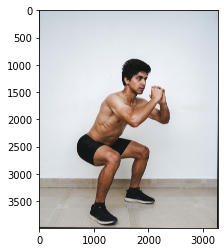

In [4]:
!curl -o input_image.jpeg https://images.pexels.com/photos/4384679/pexels-photo-4384679.jpeg --silent
    # Load the input image.
image_path = 'input_image.jpeg'
image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image)
plt.imshow(image)

In [8]:
image.shape

TensorShape([3989, 3268, 3])

image shape: (3989, 3268, 3)
aspect ratio : 0.8192529456004011
fig : Figure(720x720)


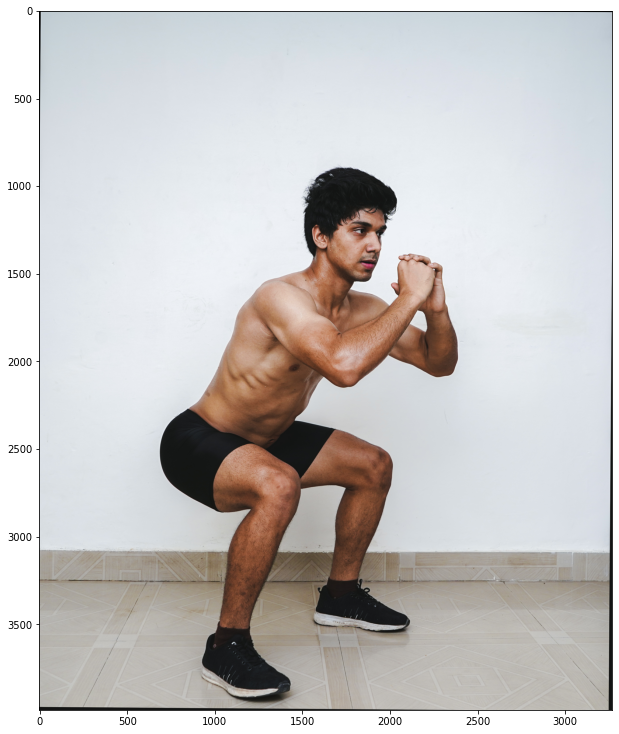

In [19]:
height, width, channel = image.shape
print(f'image shape: {image.shape}')
aspect_ratio = float(width) / height
print(f'aspect ratio : {aspect_ratio}')
fig, ax = plt.subplots(figsize=(10, 10))
print(f'fig : {fig}' )


# To remove the huge white borders
fig.tight_layout(pad=0)
ax.margins(0)



im = ax.imshow(image)

In [20]:
plt.rcParams['figure.dpi']

72.0

In [10]:
line_segments = LineCollection([], linewidths=(4), linestyle='solid')
ax.add_collection(line_segments)
# Turn off tick labels
scat = ax.scatter([], [], s=60, color='#FF1493', zorder=3)

In [ ]:
(keypoint_locs, keypoint_edges,edge_colors) = \
_keypoints_and_edges_for_display(keypoints_with_scores, height, width)
print(f'keypoint_locs.shape :{keypoint_locs.shape}')

line_segments.set_segments(keypoint_edges)
line_segments.set_color(edge_colors)
if keypoint_edges.shape[0]:
    line_segments.set_segments(keypoint_edges)
    line_segments.set_color(edge_colors)
if keypoint_locs.shape[0]:
    scat.set_offsets(keypoint_locs)

if crop_region is not None:
    xmin = max(crop_region['x_min'] * width, 0.0)
    ymin = max(crop_region['y_min'] * height, 0.0)
    rec_width = min(crop_region['x_max'], 0.99) * width - xmin
    rec_height = min(crop_region['y_max'], 0.99) * height - ymin
    rect = patches.Rectangle((xmin,ymin),rec_width,rec_height,
        linewidth=1,edgecolor='b',facecolor='none')
    ax.add_patch(rect)


fig.canvas.draw()
image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
print(image_from_plot.shape)
print(len(image_from_plot))
print(fig.canvas.get_width_height()[::-1])
image_from_plot = image_from_plot.reshape(fig.canvas.get_width_height()[::-1] + (3,))
plt.close(fig)
if output_image_height is not None:
    output_image_width = int(output_image_height / height * width)
    image_from_plot = cv2.resize(image_from_plot, dsize=(output_image_width, output_image_height),
         interpolation=cv2.INTER_CUBIC)
return image_from_plot